In [1]:
%load_ext autoreload
%autoreload 2

from geographiclib.geodesic import Geodesic
import math
from q_learning_agent import QTableAgent
from aircraft_env import Location
# from  geopy.geocoders import Nominatim
from aircraft_env import AircraftEnv
from utils.geodesic import Location
from utils.env_extra import env_summary
import pandas as pd
import numpy as np
geod = Geodesic.WGS84  # define the WGS84 ellipsoid

In [2]:

# geolocator = Nominatim(user_agent='myapplication')
# # city ="Agra"
# # country ="India"
# loc_1 = geolocator.geocode('Montréal–Trudeau International Airport')
# print("latitude is :-" ,loc_1.latitude,"\nlongtitude is:-" ,loc_1.longitude)

# loc_2 = geolocator.geocode('Charles de Gaulle Airport')
# print("latitude is :-" ,loc_2.latitude,"\nlongtitude is:-" ,loc_2.longitude)
loc_1 = Location(45.46873715, -73.74257166095532)
loc_2 = Location(49.0068908, 2.5710819691019156)
loc_1, loc_2
env = AircraftEnv(arrival_location=loc_1, destination=loc_2, n_waypoints=9)


In [3]:
df = env_summary(env)  
df

,trajectory,waypoint,speed,tas,distance,wind_magnitude,wind_direction,course,correction_angle,altitude,time_for_distance,fuel_burn,total_time,reward,fuel_flow,mach_number
0,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,0.00
1,0,1,238.563575,234.938097,699708.284530,3.930965,71.027558,48.473464,-0.367705,9600.0,2933.005526,1261.493830,2933.005526,738.506170,0.4301027798786955,0.78
2,0,2,233.860658,238.838086,692625.754972,6.226919,204.544757,61.933532,-0.907103,10209.6,2961.702758,1256.240860,5894.708284,743.759140,0.42416169444927154,0.80
3,1,3,231.390663,234.796826,694490.052475,21.894781,336.606282,72.887206,5.318389,10514.4,3001.374570,1213.885505,8896.082854,786.114495,0.40444319001381784,0.79
4,0,4,214.125839,221.302120,694438.787076,38.774459,168.151850,72.548700,-10.042194,11124.0,3243.133999,1152.005843,12139.216853,847.994157,0.35521376644448466,0.75
5,1,5,215.469497,221.302120,694457.953821,35.106116,184.117391,89.130542,-9.092793,11428.8,3222.998907,1117.996116,15362.215760,882.003884,0.34688069954760414,0.75
6,4,6,208.197726,227.203510,708650.898943,19.104725,279.880104,105.975176,-0.511553,11733.6,3403.739853,1196.012595,18765.955614,803.987405,0.3513819054110153,0.77
7,2,7,234.905463,230.154205,699877.628313,4.934129,78.169619,93.654342,0.327942,11124.0,2979.401237,1120.443999,21745.356851,879.556001,0.37606348042960663,0.78
8,1,8,253.435341,236.055595,692678.387980,18.291803,127.339210,109.825991,-1.336176,11428.8,2733.156256,1040.013843,24478.513107,959.986157,0.3805175209971742,0.80


In [4]:
df['fuel_burn'].sum()

0

In [12]:
loc_1 = Location(45.46873715, -73.74257166095532)
loc_2 = Location(49.0068908, 2.5710819691019156)
loc_1, loc_2

env = AircraftEnv(arrival_location=loc_1, destination=loc_2, n_waypoints=9)

agent = QTableAgent(env,  episode_number=50000,  epsilon_delta=30000, mach_delta=0.01, checkpoint=None,
                    save_dir='saved_models/saved_12.npy')
agent.train()

Training:   0%|          | 26/50000 [00:00<06:36, 125.99it/s]

States (Trajectory, Waypoints, Altitude) 5 x 9 x 10 / 450
Action (Trajectory, Altitude Step, Mach Number) 5 x 5 x 6 / 450
Q Table (5, 9, 10, 5, 5, 6) / 67500


Episode: 49999 | Episode Reward 15106.405776651705 | Epsilone 0.19699931301450904: 100%|██████████| 50000/50000 [06:16<00:00, 132.90it/s]


In [15]:
df = pd.read_csv('/home/shakhov/Downloads/run-May31_15-17-50_hyperion-tag-EpisodeFuel.csv')

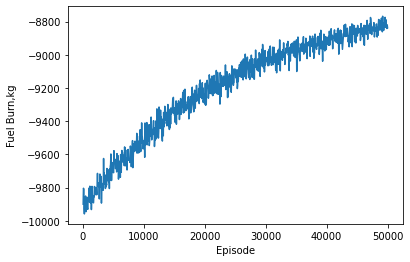

In [32]:
import matplotlib.pyplot as plt
plt.ylabel('Fuel Burn,kg')
plt.xlabel('Episode')
plt.plot(df["Step"], df["Value"])
# plt.plot()
plt.savefig('QTable-plot.png',bbox_inches='tight')

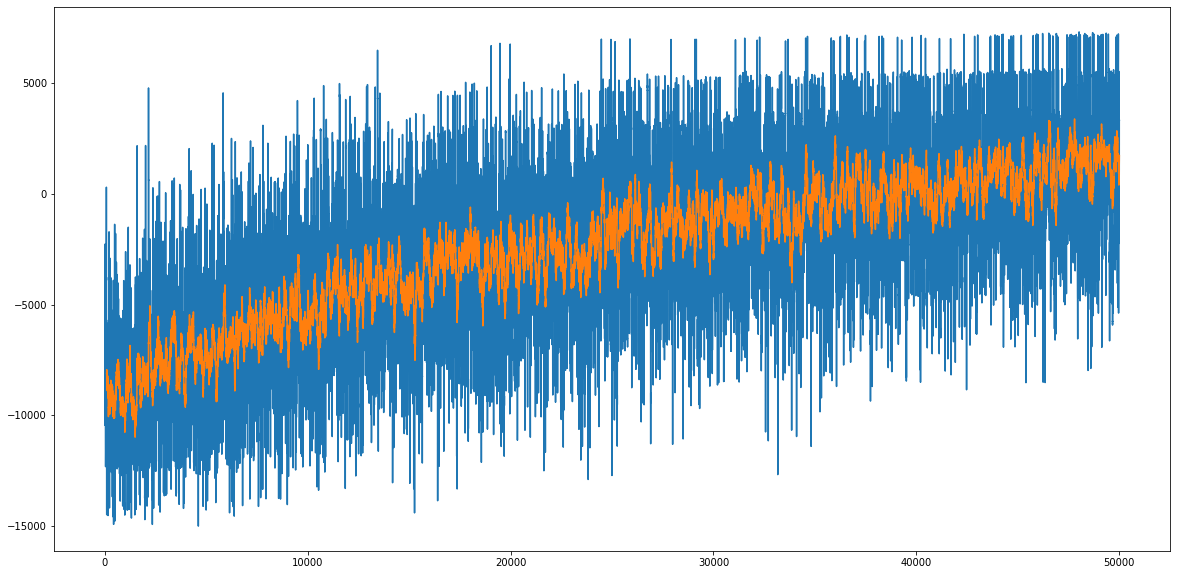

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
rewards = np.array(agent.rewards)

plt.rcParams["figure.figsize"] = (20,10)

pd.Series(rewards).rolling(window = 10).mean().plot()
pd.Series(rewards).rolling(window =100).mean().plot()
plt.show()



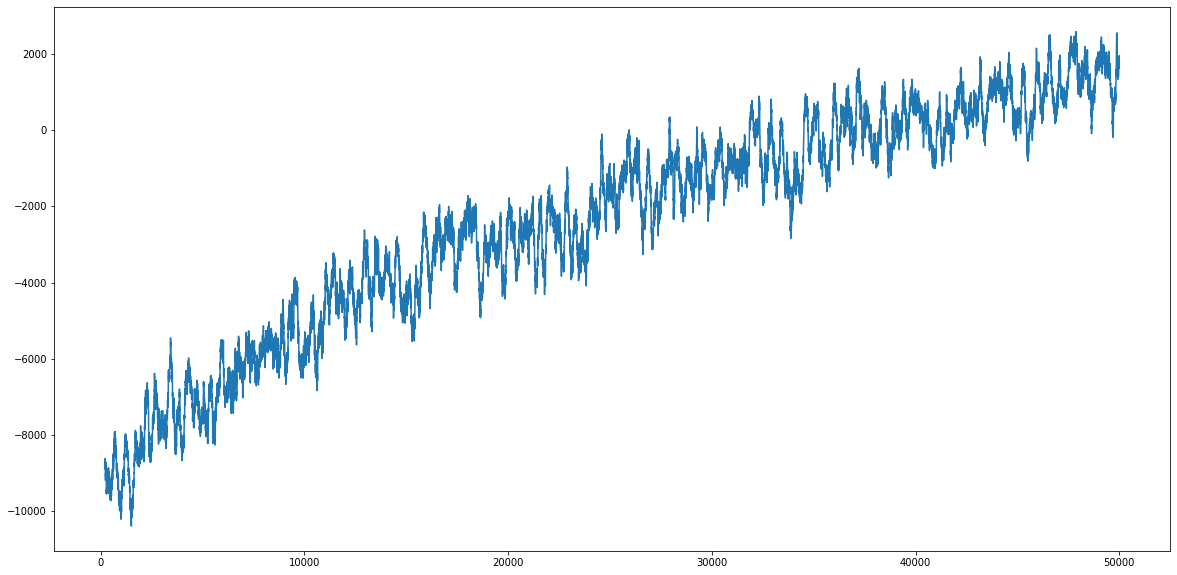

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline, BSpline
rewards = np.array(agent.rewards)
# 300 represents number of points to make between T.min and T.max
# xnew = np.linspace(rewards.min(), rewards.max(), len(rewards)) 
plt.rcParams["figure.figsize"] = (20,10)

pd.Series(rewards).rolling(window =200).mean().plot()
# spl = make_interp_spline(np.arange(len(rewards)), rewards, k=5)  # type: BSpline
# power_smooth = spl(np.arange(len(rewards)))
plt.rcParams["figure.figsize"] = (20,10)
# plt.plot(rewards)
# plt.show()


In [57]:
from aircraft_env import feet2meter
from itertools import product
class GreedyAgent:
    def __init__(self, env):
        self.actions = list(product(
            np.arange(env.n_routes),
            np.array(list(map(feet2meter, np.arange(-2000, 3000, 1000)))),
            np.arange(env.cruise_mach_range[0], env.cruise_mach_range[-1], 0.01)
        ))
        self.env = env
    def preprocess_action(self, action):
        return {
            "trajectory": int(action[0]),
            "altitude": action[1],
            "mach_number": action[2]
        }
    def best_action(self, state):
        best_reward = -20000
        best_action = None
        
        for action in self.actions:
#             print(action)
            processed_action = self.preprocess_action(action)
#             print(processed_action)
            reward, done = self.env.act(processed_action)
            if reward > best_reward:
                best_reward = reward
                best_action = processed_action
        return best_action

In [204]:
env.possible_altitudes.shape

(5, 9)

In [210]:
np.unique(agent.q)

array([-15000.        , -15000.        , -14999.99999999, ...,
         4813.306097  ,   4816.63806657,   4816.81359823])

In [13]:
import pandas as pd
# ga = GreedyAgent(env)
# agent = QTableAgent(env,  episode_number=50000,  epsilon_delta=30000, mach_delta=0.01, checkpoint='saved_models/saved_9.npy',
#                     save_dir='saved_models/saved_10.npy')
df = env_summary(env, agent=agent)        
df

,trajectory,waypoint,speed,tas,distance,wind_magnitude,wind_direction,course,correction_angle,altitude,time_for_distance,fuel_burn,total_time,reward,fuel_flow,mach_number
0,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,0.00
1,2,1,227.717352,223.910706,692678.387980,3.930965,71.027558,56.703470,-0.248862,10209.6,3041.834019,1165.199949,0.000000,1834.800051,0.38305835935128807,0.75
2,1,2,221.192031,221.901526,694429.134740,5.769508,322.006729,58.329457,1.480811,10819.2,3139.485324,1142.997169,3041.834019,1857.002831,0.36407151200493226,0.75
3,0,3,218.852412,221.302120,694421.546201,13.545263,326.163992,64.844214,3.468860,11428.8,3173.012997,1100.656968,6181.319343,1899.343032,0.34688069954760414,0.75
4,0,4,218.884311,221.302120,692627.408837,37.808945,165.255611,76.520012,-9.834687,12038.4,3164.353832,1050.073973,9354.332339,1949.926027,0.3318446764316584,0.75
5,1,5,215.469497,221.302120,694457.953821,35.106116,184.117391,89.130542,-9.092793,12038.4,3222.998907,1069.535029,12518.686171,1930.464971,0.3318446764316584,0.75
6,0,6,202.478012,221.302120,694472.198170,19.104725,279.880104,89.596415,0.883054,12038.4,3429.864762,1138.182362,15741.685078,1861.817638,0.3318446764316584,0.75
7,0,7,227.397056,221.302120,789611.989489,15.899425,172.685200,107.089034,-3.751312,12038.4,3472.393198,1152.295197,19171.549840,1847.704803,0.3318446764316584,0.75
8,0,8,248.823830,221.302120,599373.980373,27.839582,122.362339,114.192916,-1.024281,12038.4,2408.828692,799.356978,22643.943038,2200.643022,0.3318446764316584,0.75


In [ ]:
            with open(self.save_dir, 'wb') as f:
                np.save(f, self.q)

In [247]:
env.save_possible_altitude()

In [14]:
df['fuel_burn'].sum()

8618.29762540234

In [220]:
env.possible_altitudes.shape

(5, 9)

In [236]:
env.possible_altitudes[:, (0,1,2)]

array([[12240.        , 12240.        , 11126.51791869],
       [12240.        , 12240.        , 12240.        ],
       [12240.        , 12240.        , 12240.        ],
       [12240.        , 12240.        , 12240.        ],
       [12240.        , 12240.        , 12240.        ]])

In [212]:
df['fuel_burn'].sum()

12182.026708818348

In [10]:
env._waypoints_to_array().shape

(5, 9, 2)

In [67]:
j.shape

(5, 9)

In [96]:
import random
# np.arange
import time
start = time.time()
ls = []
for k in range(1):
    j = np.full((5, 9), env.cruise_alt_max)
    l = random.choices(np.arange(7), weights=[50, 70, 80, 40, 80, 70, 60])[0]
    ls.append(l)
    dct = {}
    st = set()
    for i in range(l):
        while True:
            trajectory = np.random.randint(5)
            wp = np.random.randint(9)
            if (trajectory, wp) in st:
                continue
            if wp in dct:
                if dct[wp] == 4:
                    continue
                dct[wp] += 1
            dct[wp] = 1
            st.add((trajectory, wp))
#             print(j[trajectory], trajectory)
            j[trajectory, wp] = np.random.uniform(env.cruise_alt_min, env.cruise_alt_max - 400)
            
            
            break
print(time.time() - start)

0.0007166862487792969


In [113]:
agent.actions[0]

array([0, 1, 2, 3, 4])

In [117]:
actions[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])

In [121]:
env.possible_altitudes[0]

array([12240.        , 12240.        , 11126.51791869, 12240.        ,
       12240.        , 12240.        , 11046.66430962, 12240.        ,
       12240.        ])

In [124]:
agent.actions[1]

array([-609.6, -304.8,    0. ,  304.8,  609.6])

In [ ]:
actions[np.where(env.valid_action2(9600 + actions[:, 1], 0, tuple(actions[:, 0].astype(int))))[0]]

In [152]:
g = np.array(valid_actions)
g

<ipython-input-152-6c2bf3cfe8d9>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  g = np.array(valid_actions)


array([[0, list([3, 4])],
       [1, list([3, 4])],
       [2, list([3, 4])],
       [3, list([3, 4])]], dtype=object)

In [182]:
agent.q[0, 0, 0][(1,2), :, :][:, (1, 2), :] = 100
agent.q[0, 0, 0][(1,2), :, :][:, (1, 2), :]

array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]])

In [109]:
agent.actions[1]

array([-609.6, -304.8,    0. ,  304.8,  609.6])

In [106]:
from itertools import product
actions = np.array(list(product(*agent.actions)))
actions[:,1]

array([-609.6, -609.6, -609.6, -609.6, -609.6, -609.6, -304.8, -304.8,
       -304.8, -304.8, -304.8, -304.8,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,  304.8,  304.8,  304.8,  304.8,  304.8,  304.8,
        609.6,  609.6,  609.6,  609.6,  609.6,  609.6, -609.6, -609.6,
       -609.6, -609.6, -609.6, -609.6, -304.8, -304.8, -304.8, -304.8,
       -304.8, -304.8,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
        304.8,  304.8,  304.8,  304.8,  304.8,  304.8,  609.6,  609.6,
        609.6,  609.6,  609.6,  609.6, -609.6, -609.6, -609.6, -609.6,
       -609.6, -609.6, -304.8, -304.8, -304.8, -304.8, -304.8, -304.8,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,  304.8,  304.8,
        304.8,  304.8,  304.8,  304.8,  609.6,  609.6,  609.6,  609.6,
        609.6,  609.6, -609.6, -609.6, -609.6, -609.6, -609.6, -609.6,
       -304.8, -304.8, -304.8, -304.8, -304.8, -304.8,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,  304.8,  304.8,  304.8,  304.8,
      

In [98]:
env.possible_altitudes = j

In [97]:
j, ls

(array([[12240.        , 12240.        , 11126.51791869, 12240.        ,
         12240.        , 12240.        , 11046.66430962, 12240.        ,
         12240.        ],
        [12240.        , 12240.        , 12240.        , 12240.        ,
         12240.        , 12240.        , 12240.        , 12240.        ,
         12240.        ],
        [12240.        , 12240.        , 12240.        , 12240.        ,
         12240.        , 12240.        , 11744.37231609, 12240.        ,
         12240.        ],
        [12240.        , 12240.        , 12240.        , 12240.        ,
         10184.33931504, 12240.        , 12240.        , 11192.55589475,
         12240.        ],
        [12240.        , 12240.        , 12240.        , 12240.        ,
         12240.        , 12240.        , 12240.        , 12240.        ,
         12240.        ]]),
 [5])

In [18]:
x = np.array([[1, 2, 3], [3, 4, 5]])
l = np.array(np.unravel_index(x[1].argmax(), x.shape))
l

array([0, 2])

In [19]:
x[tuple(l)]

3

In [11]:
import numpy as np

for i in range(9):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-11-e47149da469e>, line 4)

In [6]:
df['fuel_burn'].sum()

8619.333081728082

In [20]:
fuels = []
for i in range(10000):
    df = env_summary(env, agent=None)        

    burned_fuel = df['fuel_burn'].sum()
    fuels.append(burned_fuel)

In [25]:
min(fuels)

8834.144463738028

(array([  14.,  170.,  537., 1172., 1676., 2106., 2246., 1529.,  500.,
          50.]),
 array([ 8834.14446374,  8985.07597668,  9136.00748962,  9286.93900256,
         9437.8705155 ,  9588.80202844,  9739.73354138,  9890.66505432,
        10041.59656726, 10192.52808021, 10343.45959315]),
 <BarContainer object of 10 artists>)

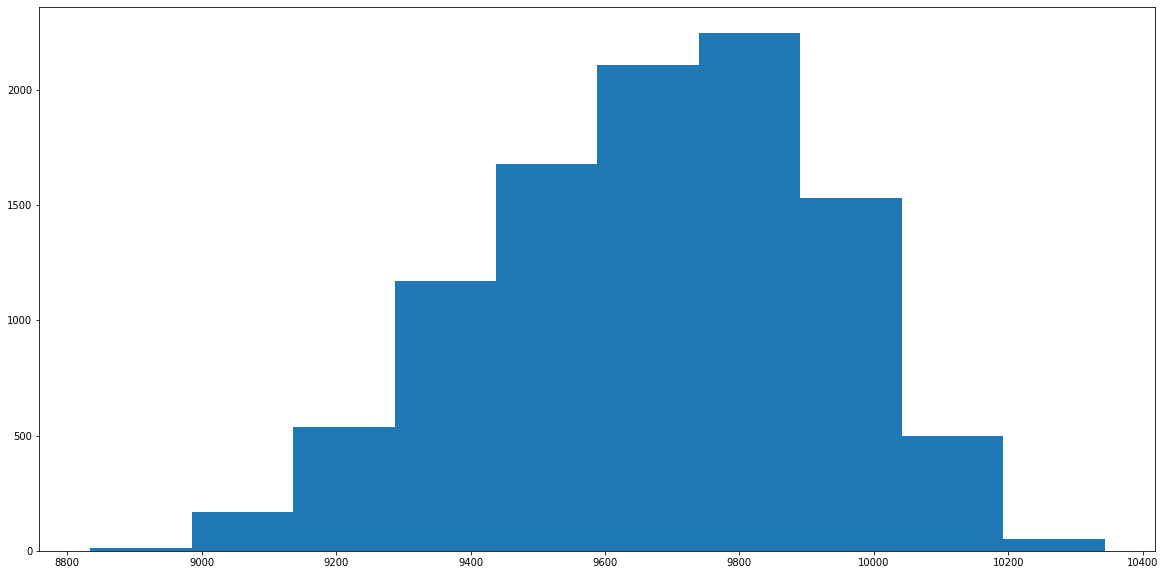

In [27]:
plt.hist(fuels)